# Neural Network

In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from warnings import simplefilter
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], 
                                                    diabetes['Outcome'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=diabetes['Outcome'])
diabetes.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Simple data fed into the Neural Network

In [101]:
mlp = MLPClassifier(activation='relu',random_state=2)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
print("Neural Network Accuracy:",mlp.score(X_train, y_train))

Neural Network Accuracy: 0.6758957654723127


## Deciding Random State

In [103]:
y = []
x = range(0,20)
for i in range(0,20):
    mlp = MLPClassifier(activation='relu',random_state=i)
    mlp.fit(X_train, y_train)
    y.append(mlp.score(X_test, y_test))
simplefilter('ignore')

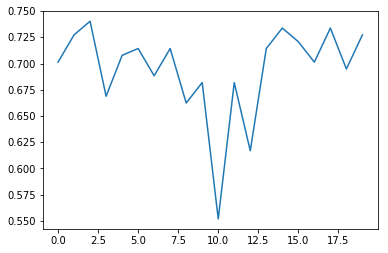

In [104]:
plt.plot(x,y)

In [113]:
mlp = MLPClassifier(activation='relu',random_state=2)
mlp.fit(X_train, y_train)
print("Neural Network Accuracy:",mlp.score(X_test, y_test))

Neural Network Accuracy: 0.7402597402597403


## On sclaing the inputs

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [107]:
# Unscaled values
print(np.array(X_test))

[[2.00e+00 5.60e+01 5.60e+01 ... 2.42e+01 3.32e-01 2.20e+01]
 [1.00e+00 9.20e+01 6.20e+01 ... 1.95e+01 4.82e-01 2.50e+01]
 [1.00e+00 1.00e+02 7.40e+01 ... 1.95e+01 1.49e-01 2.80e+01]
 ...
 [5.00e+00 1.66e+02 7.60e+01 ... 4.57e+01 3.40e-01 2.70e+01]
 [1.00e+00 1.06e+02 7.00e+01 ... 3.42e+01 1.42e-01 2.20e+01]
 [2.00e+00 1.12e+02 6.80e+01 ... 3.41e+01 3.15e-01 2.60e+01]]


In [108]:
# Scaled Values
print(X_test_scaled)

[[-0.42525864 -2.04259395 -0.58847213 ... -0.93046807 -0.40913579
  -0.89354654]
 [-0.75270779 -0.92427074 -0.27829058 ... -1.47965896  0.1196527
  -0.62478449]
 [-0.75270779 -0.67575447  0.3420725  ... -1.47965896 -1.05425775
  -0.35602245]
 ...
 [ 0.55708881  1.37450476  0.44546635 ...  1.58178813 -0.38093374
  -0.4456098 ]
 [-0.75270779 -0.48936726  0.13528481 ...  0.23802319 -1.07893455
  -0.89354654]
 [-0.42525864 -0.30298006  0.03189096 ...  0.22633827 -0.46906515
  -0.53519714]]


In [109]:
y = []
x = range(0,20)
for i in range(0,20):
    mlp = MLPClassifier(activation='relu',random_state=i)
    mlp.fit(X_train_scaled, y_train)
    y.append(mlp.score(X_test_scaled, y_test))
#simplefilter('ignore')

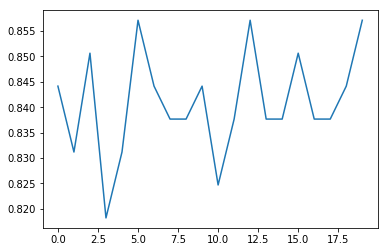

In [110]:
plt.plot(x,y)
plt.show()

In [111]:
mlp = MLPClassifier(activation='relu',random_state=2)
mlp.fit(X_train_scaled, y_train)
simplefilter("ignore")

In [112]:
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on test set: 0.851
